ANÁLISIS DE DATOS

GRUPO: 202016908_78

TUTORA
Ángela Bibiana Ortegón Fuentes

INTEGRANTES
Sergio Andrés Aponte Suarez
Daniel Cantor Verano
Richard Sneider Mendivelso Romero
Javier Alejandro Segura Rodríguez¶

In [13]:
#Cargar las librerias
import pandas as pd #Manejo y análisis de estructuras de datos
import numpy as np #Cálculo numérico y en análisis de datos
import seaborn as sns #Creación gráficas estadisticas
import matplotlib.pyplot as plt #Creación de gráficos en dos dimensiones
import plotly.graph_objs as go #Creación de gráficos en tres dimensiones
import plotly.express as px #Creación de gráficos en tres dimensiones

#Librerias de para implementar modelo kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#Librerias para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


#Libreria para evitar la advertencia de que el modelo de kmeans tiene una perdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')


In [15]:
#Lectura de datos en python y lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [17]:
#Realizamos lectura de los datos para el análisis exploratorio

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [19]:
#Descripcion de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación Datos Faltantes y Atípicos')

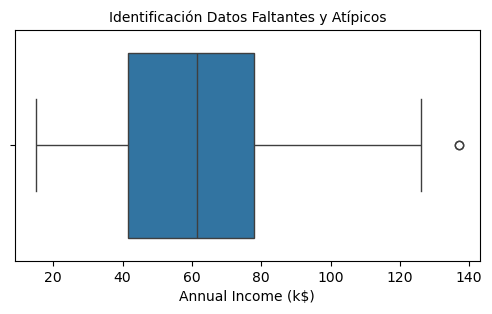

In [23]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize = (6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación Datos Faltantes y Atípicos', fontsize= 10)

Text(0.5, 1.0, 'Identificación Datos Faltantes y Atípicos')

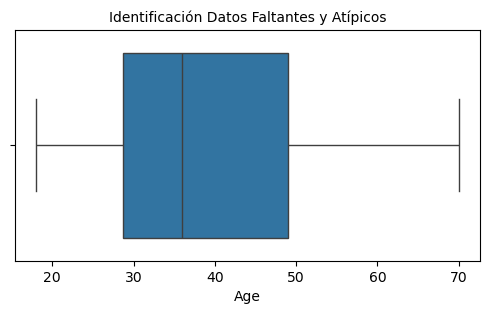

In [25]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize = (6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación Datos Faltantes y Atípicos', fontsize= 10)

Text(0.5, 1.0, 'Spending Score (1-100)')

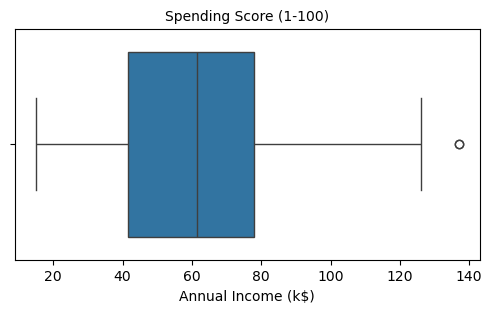

In [27]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize = (6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Spending Score (1-100)', fontsize= 10)

In [39]:
#Revisar valores faltantes

print('Cantidad de registros con cero en CustomerID ',Datos['CustomerID'].isin([0]).sum())
print('Cantidad de registros con cero en Age',Datos['Age'].isin([0]).sum())
print('Cantidad de registros con cero en Annual Income',Datos['Annual Income (k$)'].isin([0]).sum())
print('Cantidad de registros con cero en Spending Score',Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros con cero en CustomerID  0
Cantidad de registros con cero en Age 0
Cantidad de registros con cero en Annual Income 0
Cantidad de registros con cero en Spending Score 0


In [41]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
#Filtrar columnas con caracteristicas de interes para el modelo

Datos = Datos[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [45]:
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


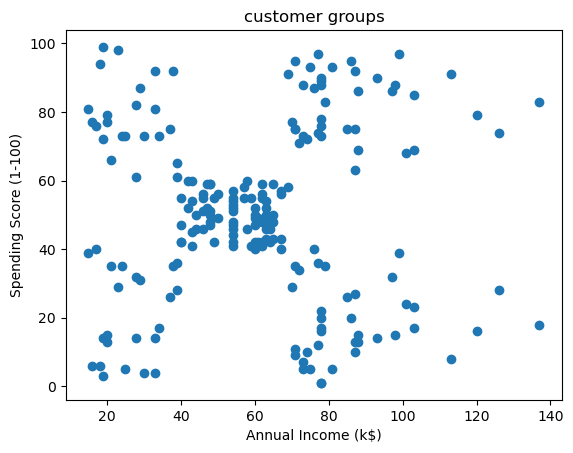

In [47]:
#Gráfica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('customer groups')
plt.show()

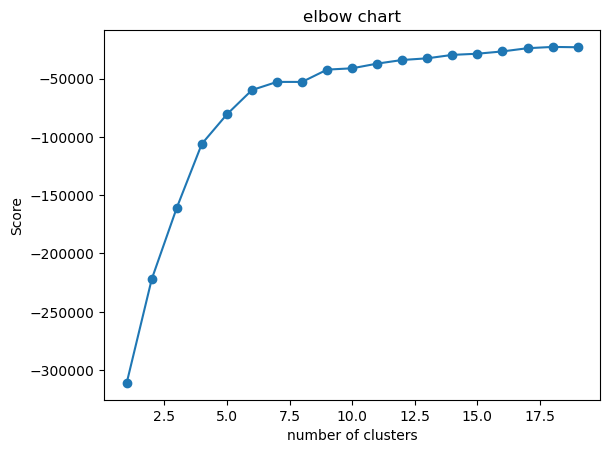

In [141]:
#Entrenamiento del modelo
#Se realiza gráfica de codo para identificar valor de k

Nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('Score')
plt.title('elbow chart')
plt.show()

In [195]:
#Generación del modelo de agrapamiento con k = 4, se realizaran 4 grupos 

Modelo = KMeans(n_clusters = 6, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=6, random_state=0)

In [197]:
#Se agrega la columna Grupo a la BD para identificar el número de grupo del agrupamiento
Modelo.labels_
Datos['Grupo'] = Modelo.labels_
print(Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [199]:
#Evaluamos el desempeño del model con el coeficiente de silhoutte el indice de Calinski-Harabasz y el índice de Davies Bouldin Score

#Preparación de la metrica de la columna grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo',axis = 1)
clusters = Datos['Grupo']

#Se calculan las métricas
sil_score = silhouette_score(X,clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

#Se crea una tabla para mostrar los valores de las métricas

table_data = [
["Número de observaciones", Observaciones],
["Coeficiente Silhouette",sil_score],
["Indice Calinski Harabasz", calinski_score],
["Indice Davies Bouldin", davies_score]    
]

#Imprime tabla

from tabulate import tabulate
print(tabulate(table_data, headers=['Metric','Value'], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Número de observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4516490888773576 |
| Indice Calinski Harabasz | 166.66394894101936 |
|  Indice Davies Bouldin   | 0.7541977161228166 |
+--------------------------+--------------------+


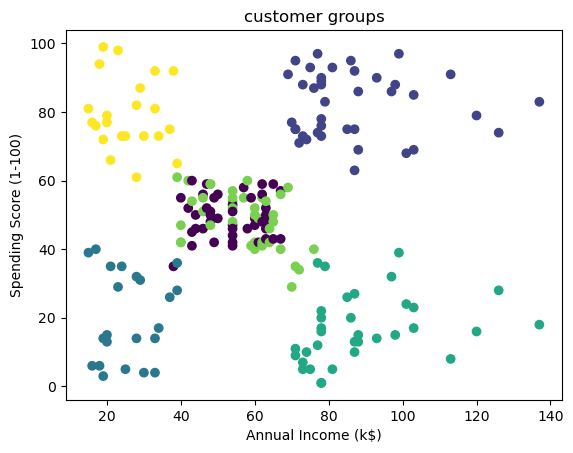

In [201]:
plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'],c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('customer groups')
plt.show()

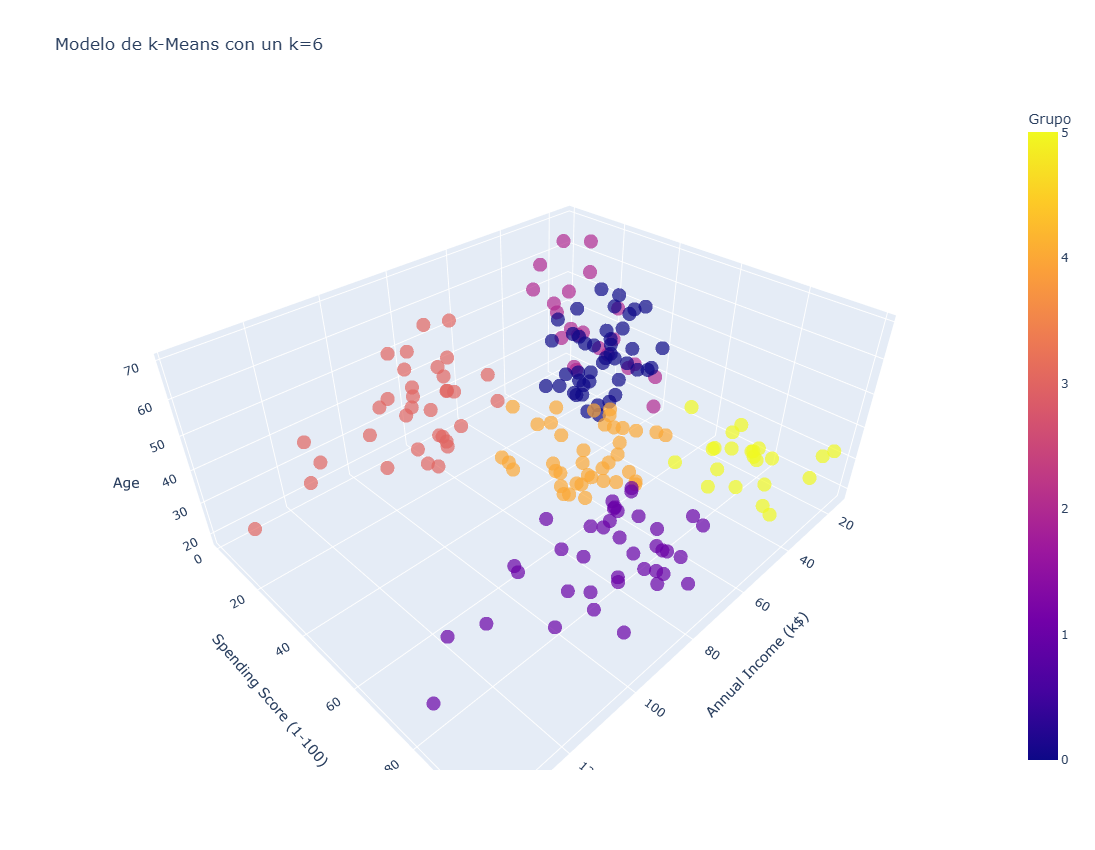

In [205]:
#Crear modelo en 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos,x = 'Annual Income (k$)', y = 'Spending Score (1-100)',z= 'Age', color = 'Grupo', symbol='Grupo', symbol_map={0: 'circle', 1:'circle',2:'circle',3:'circle',4:'circle',5:'circle' }, opacity = 0.7, width = 900, height = 850, title = f'Modelo de k-Means con un k={6}', labels={'label': 'cluster'}, color_discrete_map={} )
Grafica_3D.update_layout(showlegend=False)

Análisis de los resultados

De acuerdo con las estadisticas generadas para el modelo podemos decir que

   
*El resultado Coeficiente Silhouette",sil_score fue de 0.45, si bien un resultado más cercano al 1 sería optimo, con el resultado obtenido podemos definir que se tiene un buen nivel de separación entre los grupos, que pueden existir algunas superposiciones entre ellos

*El resultado para Indice Calinski Harabasz fue de 166.58, el cual es un nivel aceptable, aunque podríamos intentar subir el valorque me indique que los clusters están bien definidos, este valor fue el más alto obtenido sin poner el riesgo el performance del algoritmo.

*El resultado Indice Davies Bouldin tiene un valor de 0.75, lo cual es razonable ya que se aleja del 1 y me indica un valor moderado de similitud entre cada grupo, por lo cual considero que la separación entre grupos es eficiente para el trabajo que se necesita.

